## **Import the necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from scipy import stats
from scipy.stats import norm
import statistics

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_squared_error, roc_curve, r2_score, mean_squared_error
from sklearn.model_selection import cross_validate

from sklearn.feature_selection import chi2, mutual_info_regression, mutual_info_classif
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import PowerTransformer, LabelEncoder, OneHotEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

%matplotlib inline

## **Import Data**

In [ ]:
from google.colab import files
data = files.upload()

Saving Loan_Data.csv to Loan_Data (1).csv


In [ ]:
loan_data = pd.read_csv("Loan_Data.csv")

NameError: ignored

In [ ]:
loan_data.shape

NameError: ignored

In [ ]:
loan_data.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


### **Missing** **Values**

In [ ]:
loan_data.dtypes

Customer ID                     object
Name                            object
Gender                          object
Age                              int64
Income (USD)                   float64
Income Stability                object
Profession                      object
Type of Employment              object
Location                        object
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Expense Type 1                  object
Expense Type 2                  object
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Has Active Credit Card          object
Property ID                      int64
Property Age                   float64
Property Type                    int64
Property Location               object
Co-Applicant                     int64
Property Price                 float64
Loan Sanction Amount (USD)     float64
dtype: object

In [ ]:
#Missing Value Count and Percentage

no_of_rows = loan_data.shape[0]
missing_df = loan_data.isnull().sum().sort_values(ascending=False).to_frame(name='Missing_count')
missing_df['Missing_percentage'] = np.round((missing_df['Missing_count'] / no_of_rows)*100, 3)
missing_df

,Missing_count,Missing_percentage
Type of Employment,7270,24.233
Property Age,4850,16.167
Income (USD),4576,15.253
Dependents,2493,8.310
Credit Score,1703,5.677
Income Stability,1683,5.610
Has Active Credit Card,1566,5.220
Property Location,356,1.187
Loan Sanction Amount (USD),340,1.133
Current Loan Expenses (USD),172,0.573


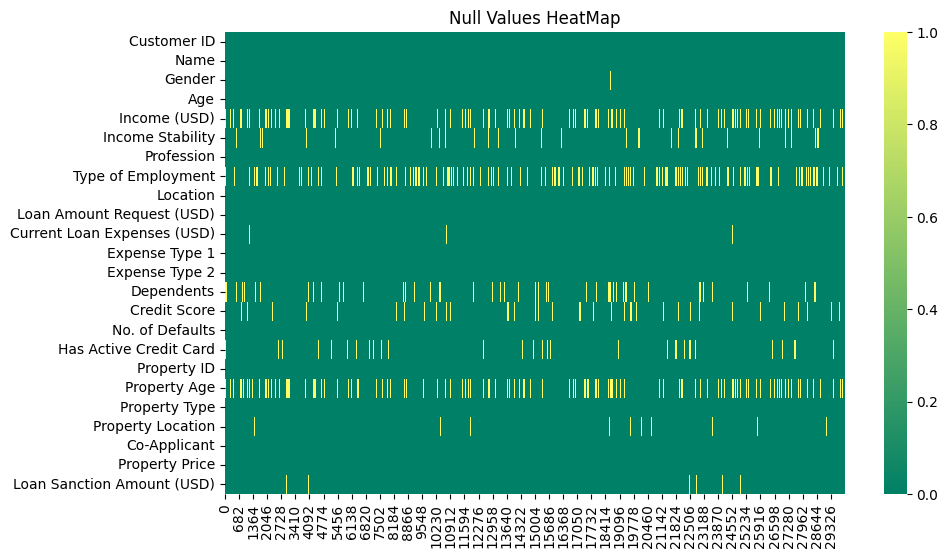

In [ ]:
#Heat Map of Missing Values

plt.figure(figsize=(10, 6))
sns.heatmap(loan_data.isnull().T, cmap='summer')
plt.title("Null Values HeatMap")
plt.show()

In [ ]:
rows, cols = loan_data.shape[0], loan_data.shape[1]
total_cell = rows*cols
total_cell

720000

In [ ]:
missing_values_count = loan_data.isnull().sum()
total_missing_Values = missing_values_count.sum()
missing_percent = (total_missing_Values/total_cell)*100
missing_percent

3.480833333333333

In [ ]:
loan_data.duplicated(keep=False).sum()

0

*   There are around 3.5% data are missing
*   Features like "Type of Employment", "Property Age" and "Income Age"	has highest missing values around 25%, 16% and 15%
*   Remaining some features "Dependents", "Credit Score", "Income Stability", "Has Active Credit Card", "Property Location", "Loan Sanction Amount (USD)", "Current Loan Expenses (USD)", "Gender" has less missing data; Which can be treated using some methods.








### **Univarite** **Analysis**

In [ ]:
Categorical = [feature for feature in loan_data.columns if loan_data[feature].dtype == 'object']
Categorical

['Customer ID',
 'Name',
 'Gender',
 'Income Stability',
 'Profession',
 'Type of Employment',
 'Location',
 'Expense Type 1',
 'Expense Type 2',
 'Has Active Credit Card',
 'Property Location']

In [ ]:
for feature in Categorical:
  print(f'{feature} : \n[ {loan_data[feature].value_counts() } ] \n')

Customer ID : 
[ C-36995    1
C-19038    1
C-7801     1
C-20856    1
C-7007     1
          ..
C-1792     1
C-12912    1
C-22733    1
C-24853    1
C-33003    1
Name: Customer ID, Length: 30000, dtype: int64 ] 

Name : 
[ Frederica Shealy     1
Sherwood Byham       1
Horacio Hofer        1
Rebecka Pietrzak     1
Tara Lofthouse       1
                    ..
Gracie Millener      1
Evelyne Devries      1
Karlyn Harbin        1
Sherwood Denker      1
Bridget Garibaldi    1
Name: Name, Length: 30000, dtype: int64 ] 

Gender : 
[ M     15053
F     14893
HH        1
Name: Gender, dtype: int64 ] 

Income Stability : 
[ Low     25751
High     2566
Name: Income Stability, dtype: int64 ] 

Profession : 
[ Working                 16926
Commercial associate     7962
Pensioner                2740
State servant            2366
Unemployed                  2
Businessman                 2
Student                     1
Maternity leave             1
Name: Profession, dtype: int64 ] 

Type of Employment : 

In [ ]:
Numerical = [feature for feature in loan_data.columns if loan_data[feature].dtype == 'float64' or loan_data[feature].dtype == 'int64']

In [ ]:
for col in Numerical:
    max_value = loan_data[col].max()
    min_value = loan_data[col].min()
    print(f"{col} : [{min_value} to {max_value}]")

Age : [18 to 65]
Income (USD) : [377.7 to 1777460.21]
Loan Amount Request (USD) : [6048.24 to 621497.82]
Current Loan Expenses (USD) : [-999.0 to 3840.88]
Dependents : [1.0 to 14.0]
Credit Score : [580.0 to 896.26]
No. of Defaults : [0 to 1]
Property ID : [1 to 999]
Property Age : [377.7 to 1777460.21]
Property Type : [1 to 4]
Co-Applicant : [-999 to 1]
Property Price : [-999.0 to 1077966.73]
Loan Sanction Amount (USD) : [-999.0 to 481907.32]


Some features in date set show some unsual values

*   Current Loan Expenses (USD) - [-999.0 to 3840.88]
*   Co-Applicant - [-999 to 1]
*   Property Price - [-999.0 to 1077966.73]
*   Loan Sanction Amount (USD) - [-999.0 to 481907.32]






In [ ]:
#checking Co-Applicant
loan_data['Co-Applicant'].unique()

array([   1,    0, -999])

In [ ]:
# features with -999 values
vars = ['Property Price','Co-Applicant','Current Loan Expenses (USD)','Loan Sanction Amount (USD)']
(loan_data[vars] == -999).sum()


Property Price                 352
Co-Applicant                   168
Current Loan Expenses (USD)    177
Loan Sanction Amount (USD)     338
dtype: int64

We will drop rows that contains the value -999 as it is a sprecial or null value which mis-lead the data.

In [ ]:
# dropping rows containing -999


index_to_keep = (loan_data[vars] != -999).all(axis=1)
loan_data = loan_data.loc[index_to_keep]

In [ ]:
loan_data.shape

(28997, 24)

### **Analysis** **of** **Numerical** **Features**

In [ ]:
def box_plot(loan_data, feature):
    data.boxplot(loan_data[feature])
    plt.ylabel(loan_data[feature])
    plt.title(loan_data[feature])
    plt.show()


def hist_plot(loan_data, feature):
  fig, ax = plt.subplots(figsize=(8, 6))
  sns.histplot(loan_data[feature]/365.25, kde=True)
  plt.title('{} distribution'.format(feature))
  return plt.show()

Age


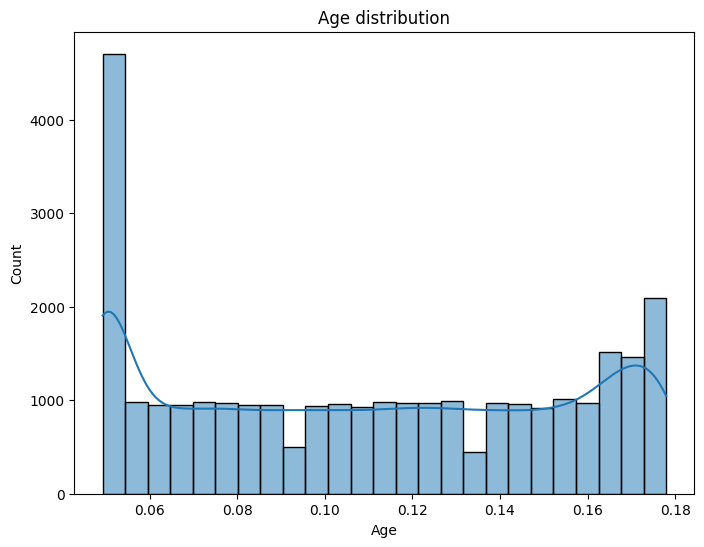

Income (USD)


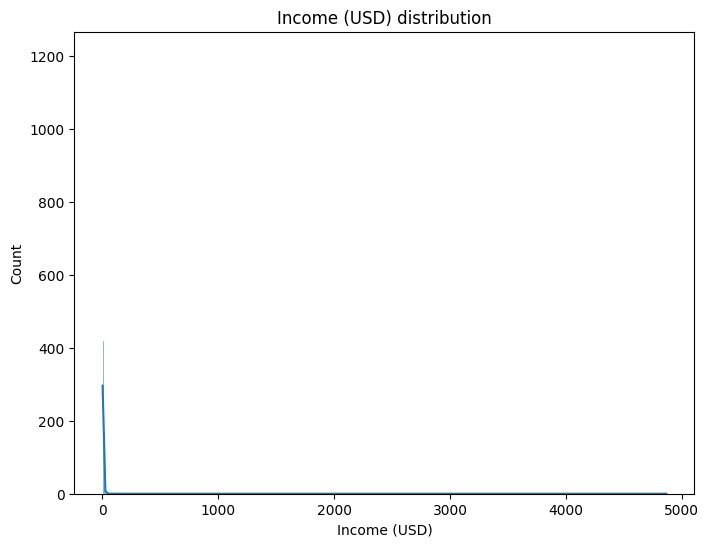

Loan Amount Request (USD)


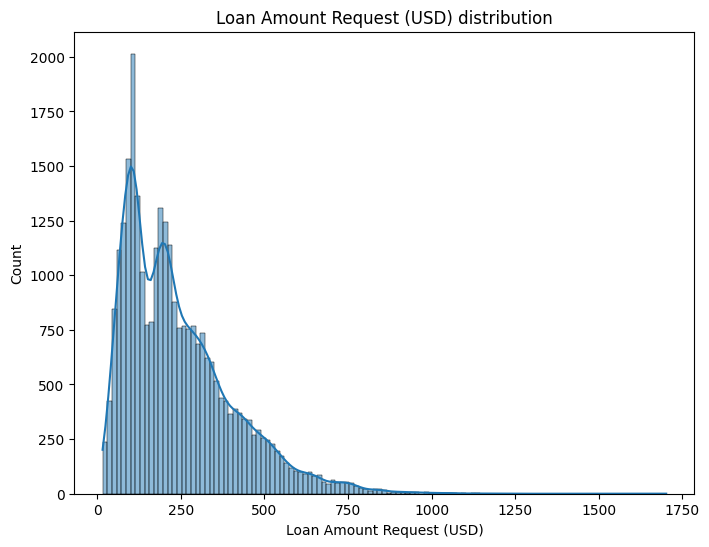

Current Loan Expenses (USD)


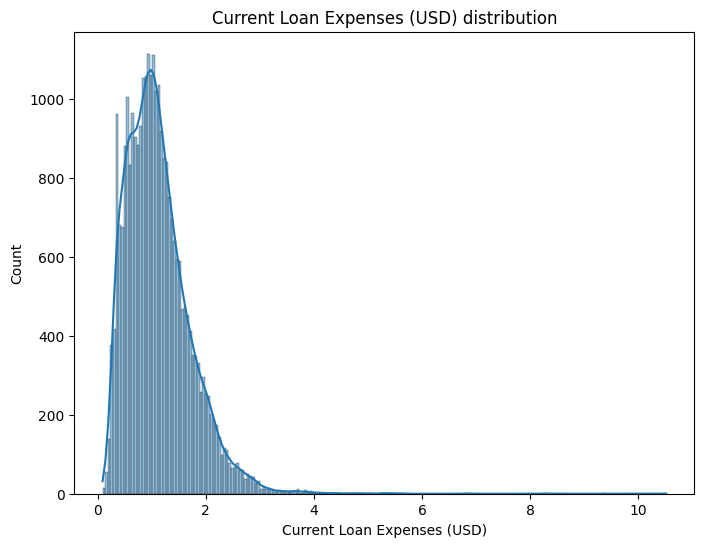

Dependents


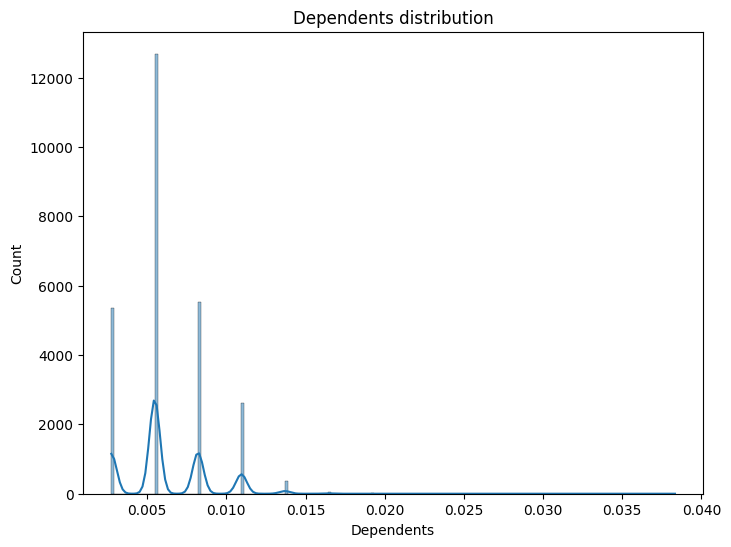

Credit Score


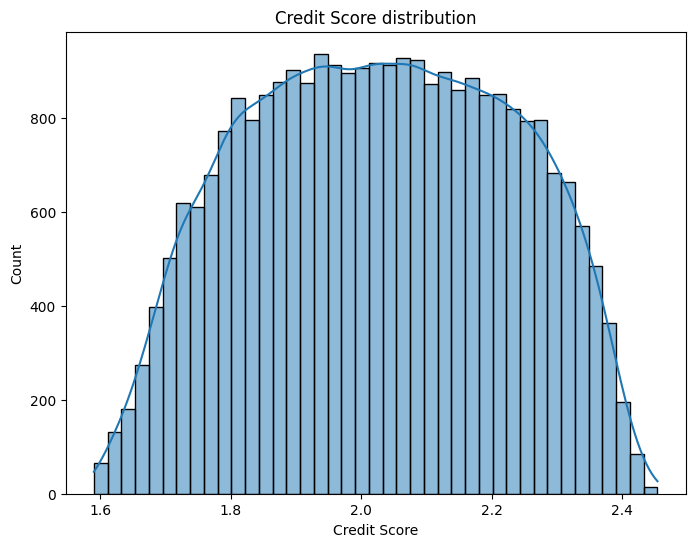

No. of Defaults


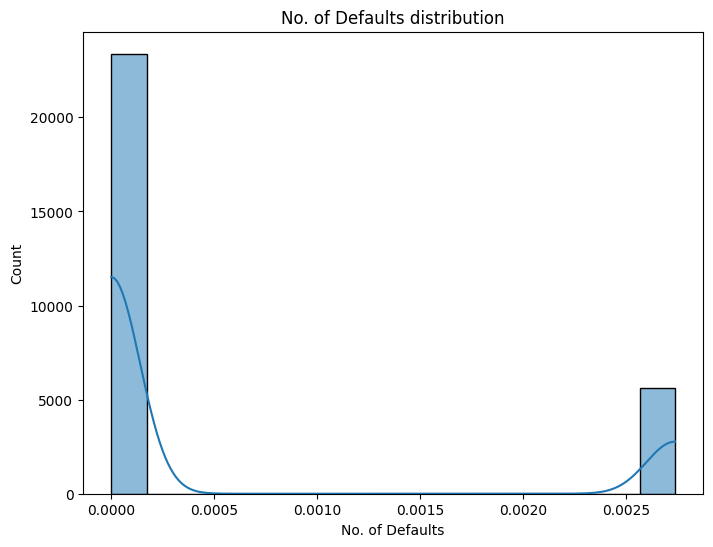

Property ID


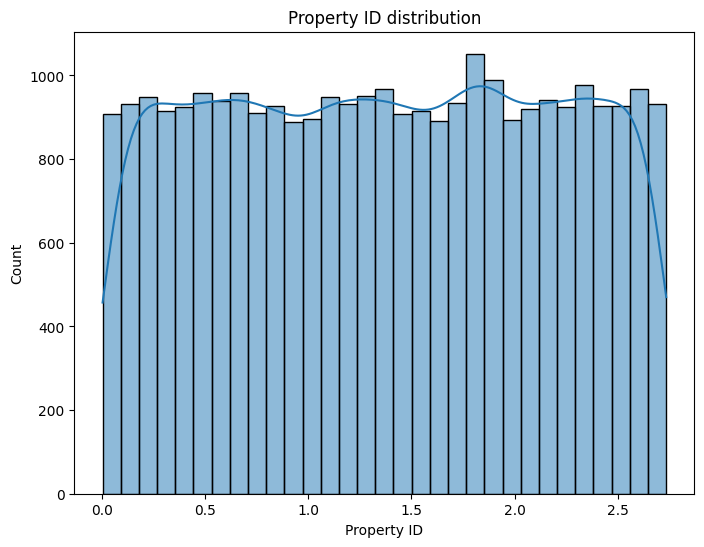

Property Age


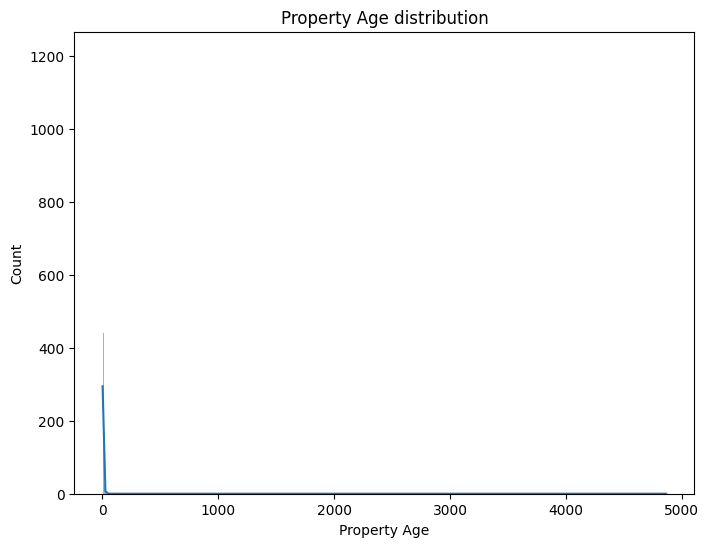

Property Type


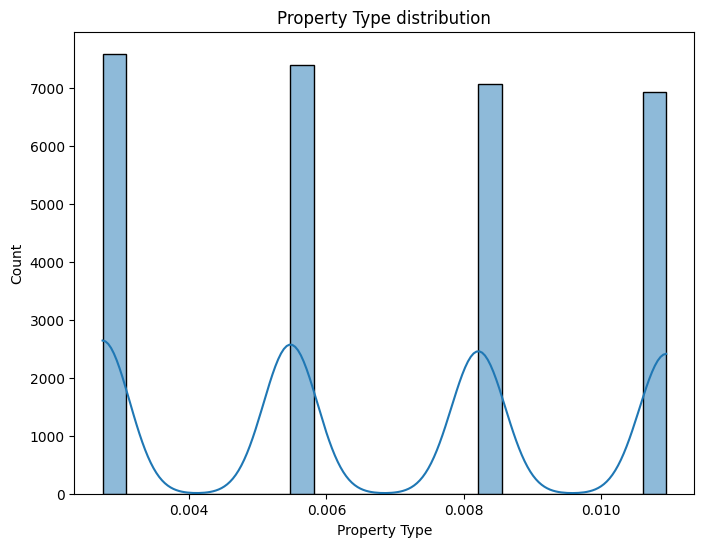

Co-Applicant


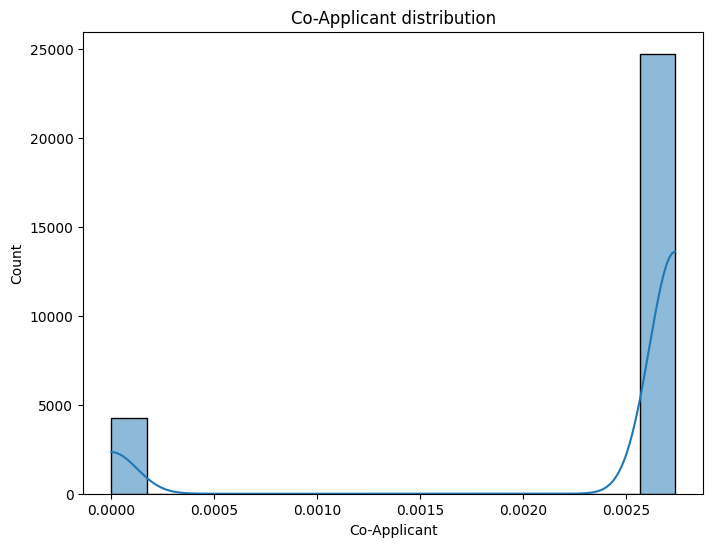

Property Price


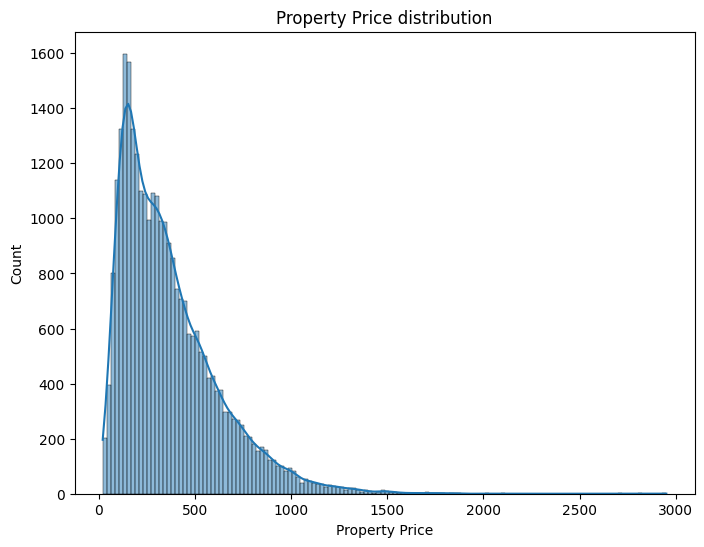

Loan Sanction Amount (USD)


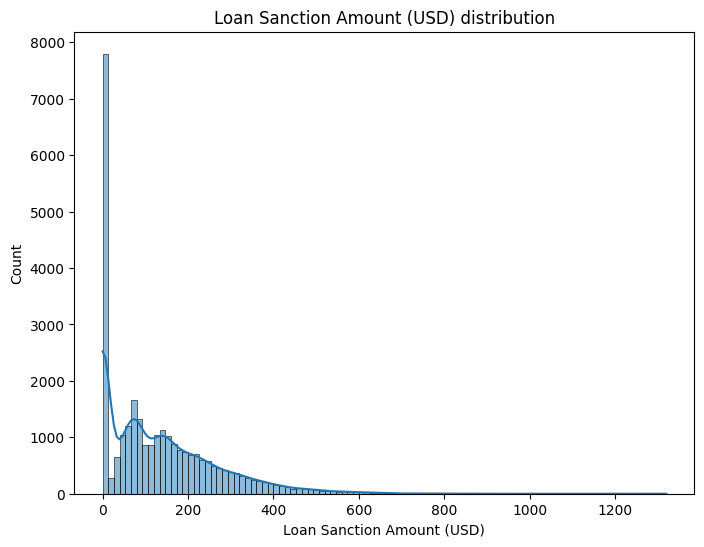

In [ ]:
#Distribution of Numerical features

for feature in Numerical:
  print(feature)
  hist_plot(loan_data, feature)



*   There are some outlayers present in Income (USD), Current Loan Expenses (USD), Dependents
*   Most continous values does not have a normal distribution
*   Age surprising does not show any relation with target









Analysing Continuous Data



*   Basic Overview
*   what kind of relation with target can we can infer from the scatterplot
*   look for outliers




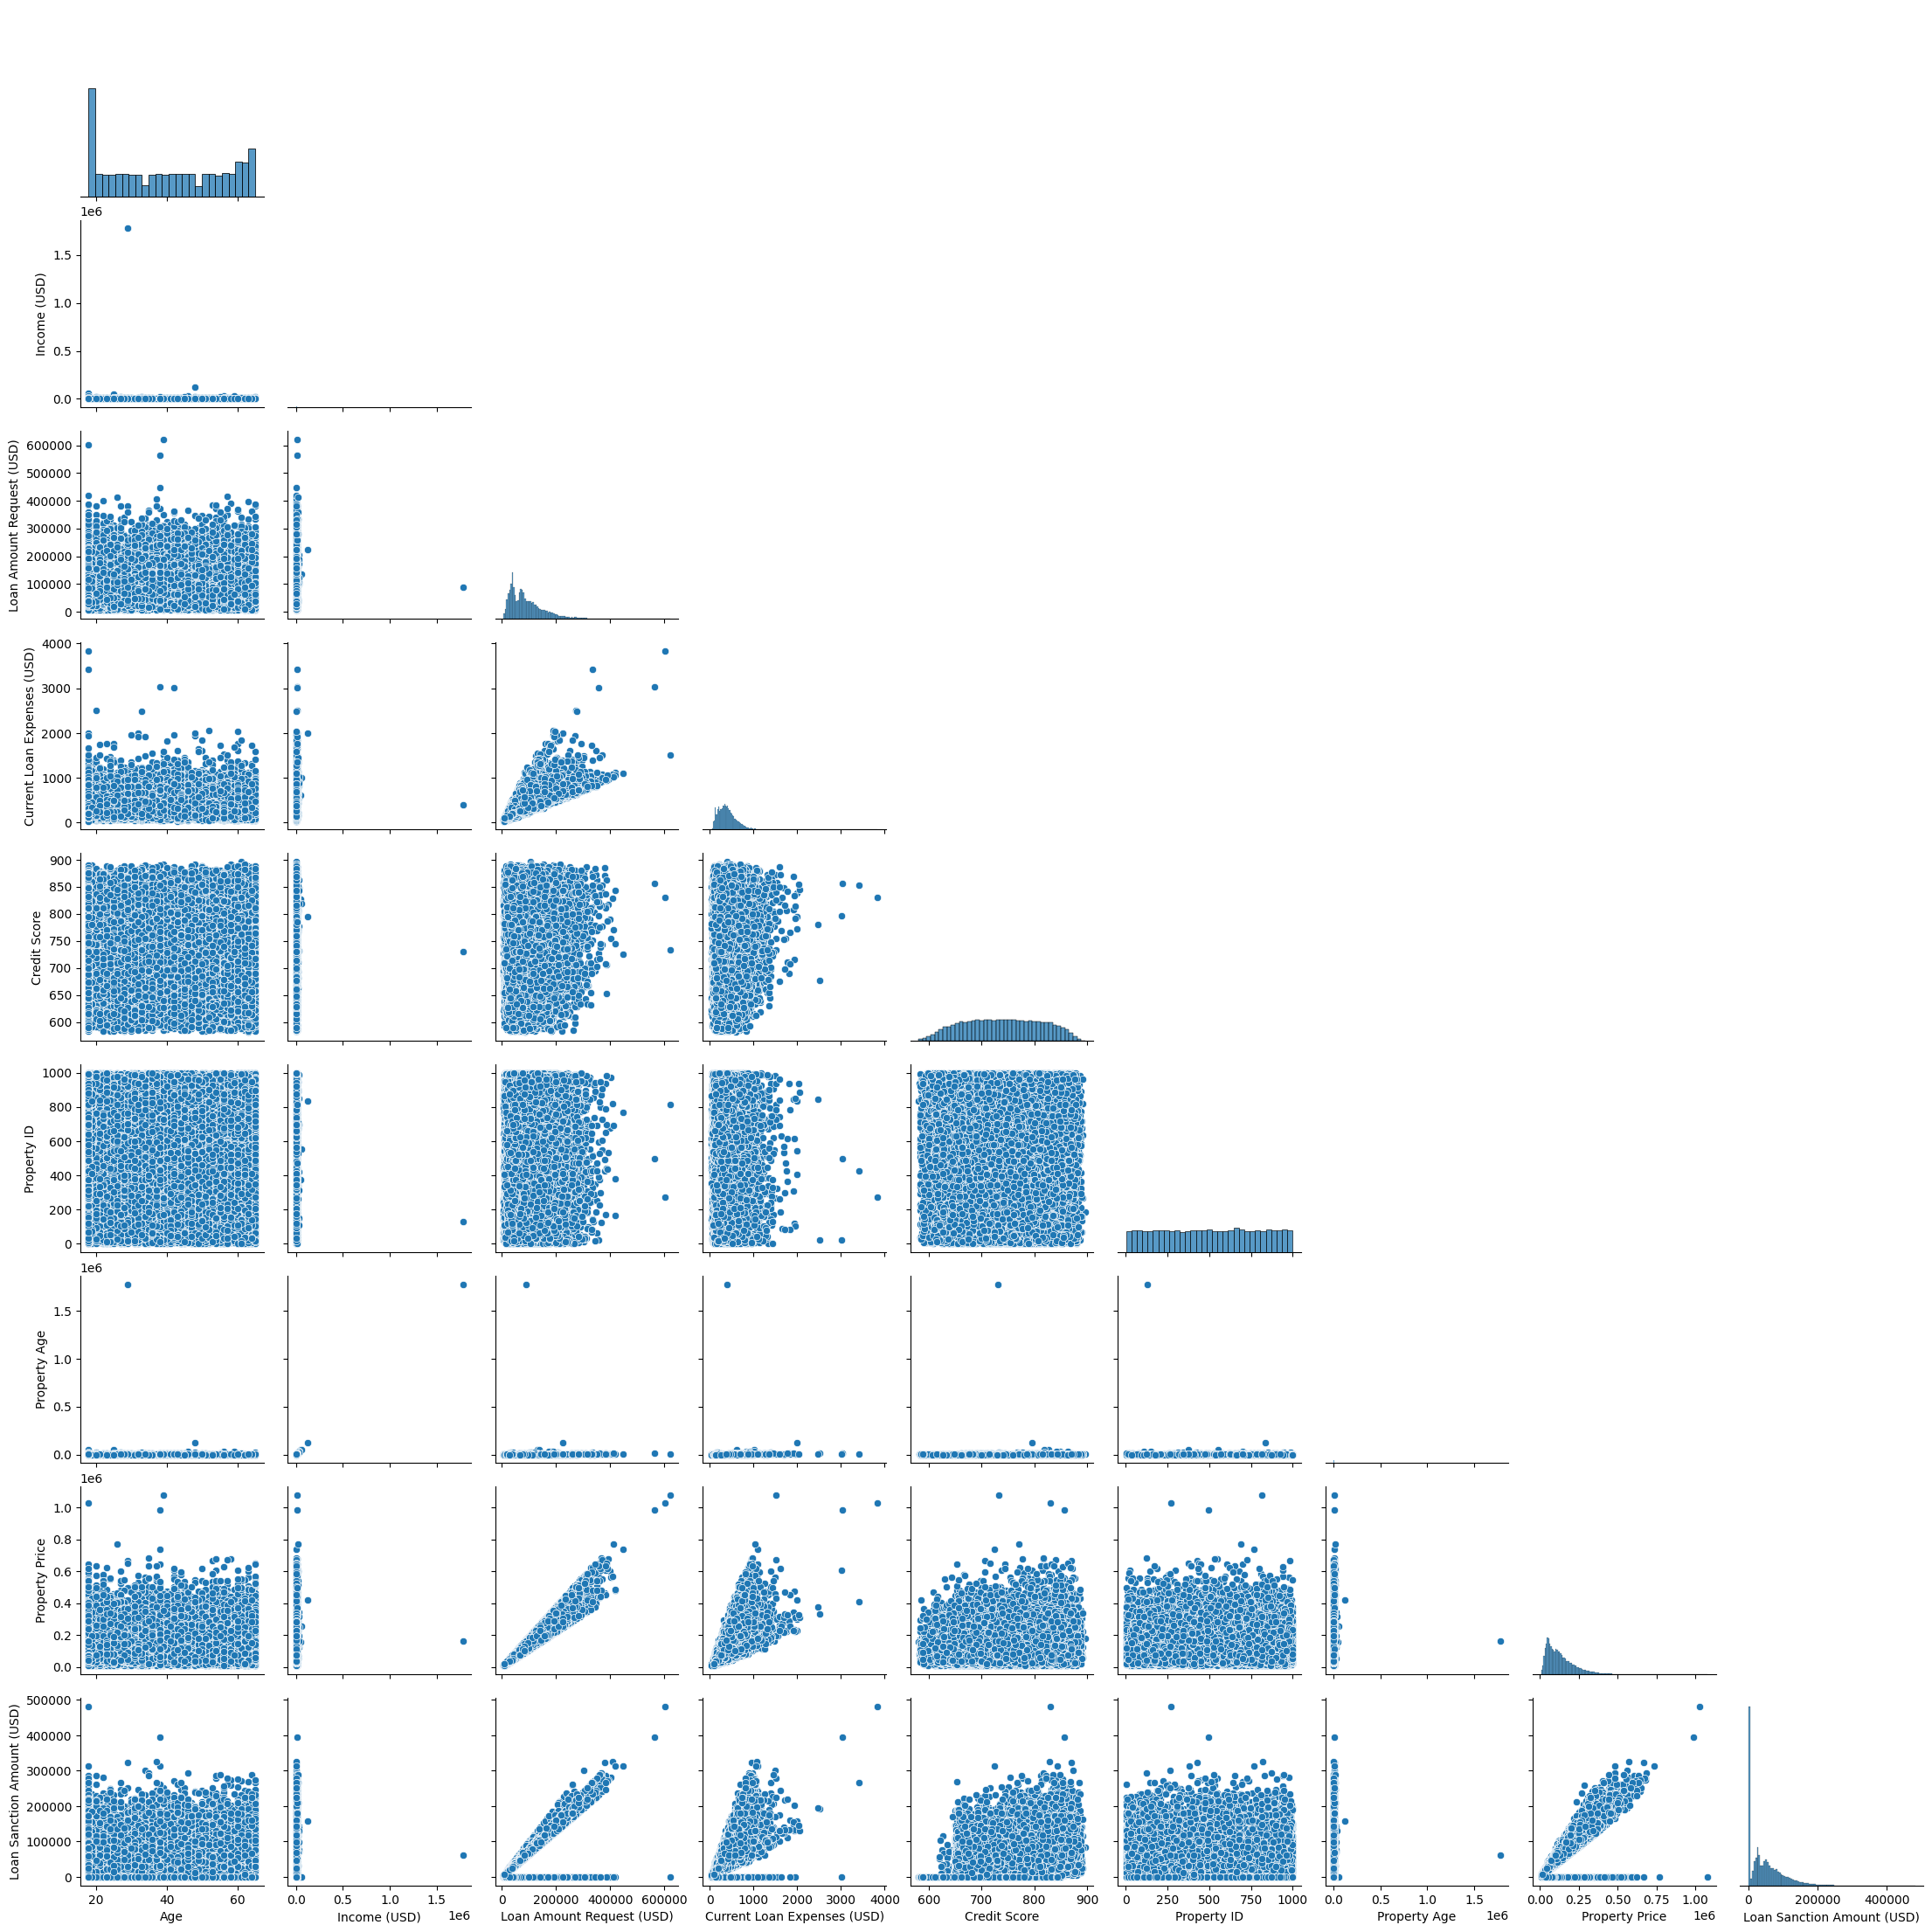

In [ ]:
# overview for all continous features

sns.pairplot(loan_data.drop(['Dependents','No. of Defaults','Property Type','Co-Applicant'],axis=1),corner=True)
plt.show()


Insigts :


*   There is a positive correlation between the loan amount request and the current loan expenses.
*   There is also a perfect positive correlation between the income and the property age
*   There is a colleration between property price and loan amount request.
*   There is a colleration between loan sanction amount and loan amount request.
*   We also find a correlation between the property price and current loan expenses.
*   There is a correlation between loan sanction amount and current loan expenses.




<ipython-input-24-3f511c1b7d02>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  loan_data_copy = loan_data.drop(['Dependents','No. of Defaults','Property Type','Co-Applicant'],axis=1).corr()


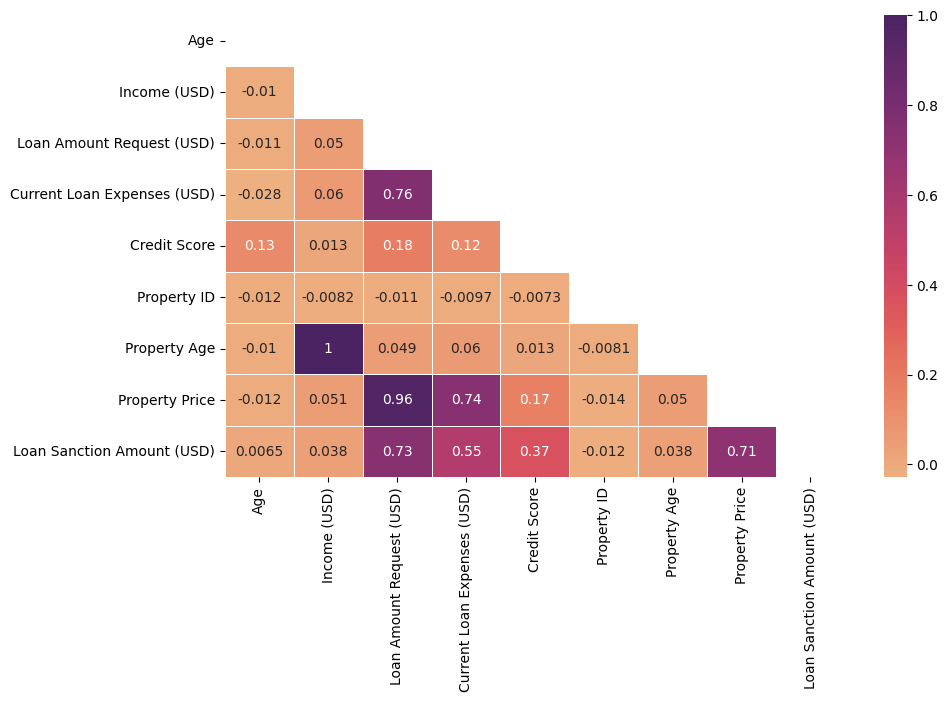

In [ ]:
#correlation between variables

loan_data_copy = loan_data.drop(['Dependents','No. of Defaults','Property Type','Co-Applicant'],axis=1).corr()
mask = np.zeros_like(loan_data_copy, dtype='bool')
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(loan_data_copy, annot=True, cmap='flare',mask=mask, linewidths=.5)
plt.show()

Insights :  


*   Income is highly correlated with Property age
*   Loan Amount Request is highly correlated with Property Price
*   Loan Amount Request is highly correlated with Loan Sanction Amount
*   Current Loan Expenses is correlated with Property Price  
*   Loan Sanction Amount is highly correlated with Property Price












### Analysis of categorical features

In [ ]:
cat_feats= loan_data.drop(columns=['Customer ID', 'Loan Sanction Amount (USD)']).select_dtypes(include=['object']).columns

In [ ]:
loan_greater_than_zero = loan_data[loan_data['Loan Sanction Amount (USD)']>0]

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:3869: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(stats.DegenerateDataWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:3861: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


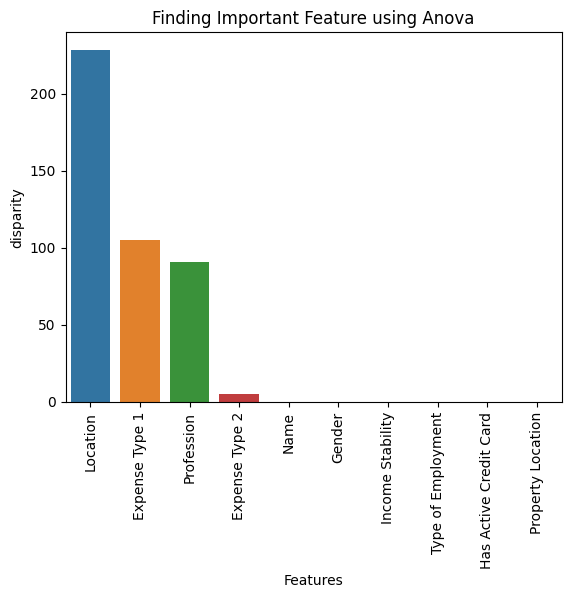

In [ ]:
def anova(frame):
    anv = pd.DataFrame()
    anv['Features'] = cat_feats
    pvals = []

    for feats in anv['Features']:
        samples = []
#         taking all values for each categoray and storing them in samples
        for category in frame[feats].unique():
            s = frame[frame[feats] == category]['Loan Sanction Amount (USD)'].values
            samples.append(s)

#         calculating pval for each sample
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)

    anv['Pvals'] = pvals

    return anv.sort_values(by='Pvals')

a = anova(loan_greater_than_zero)
a['disparity'] = np.log(1./a['Pvals'].values)
sns.barplot(data=a, x='Features', y='disparity')
plt.xticks(rotation=90)

plt.title("Finding Important Feature using Anova")
plt.show()

### Numerical vs categorical features (ANOVA)

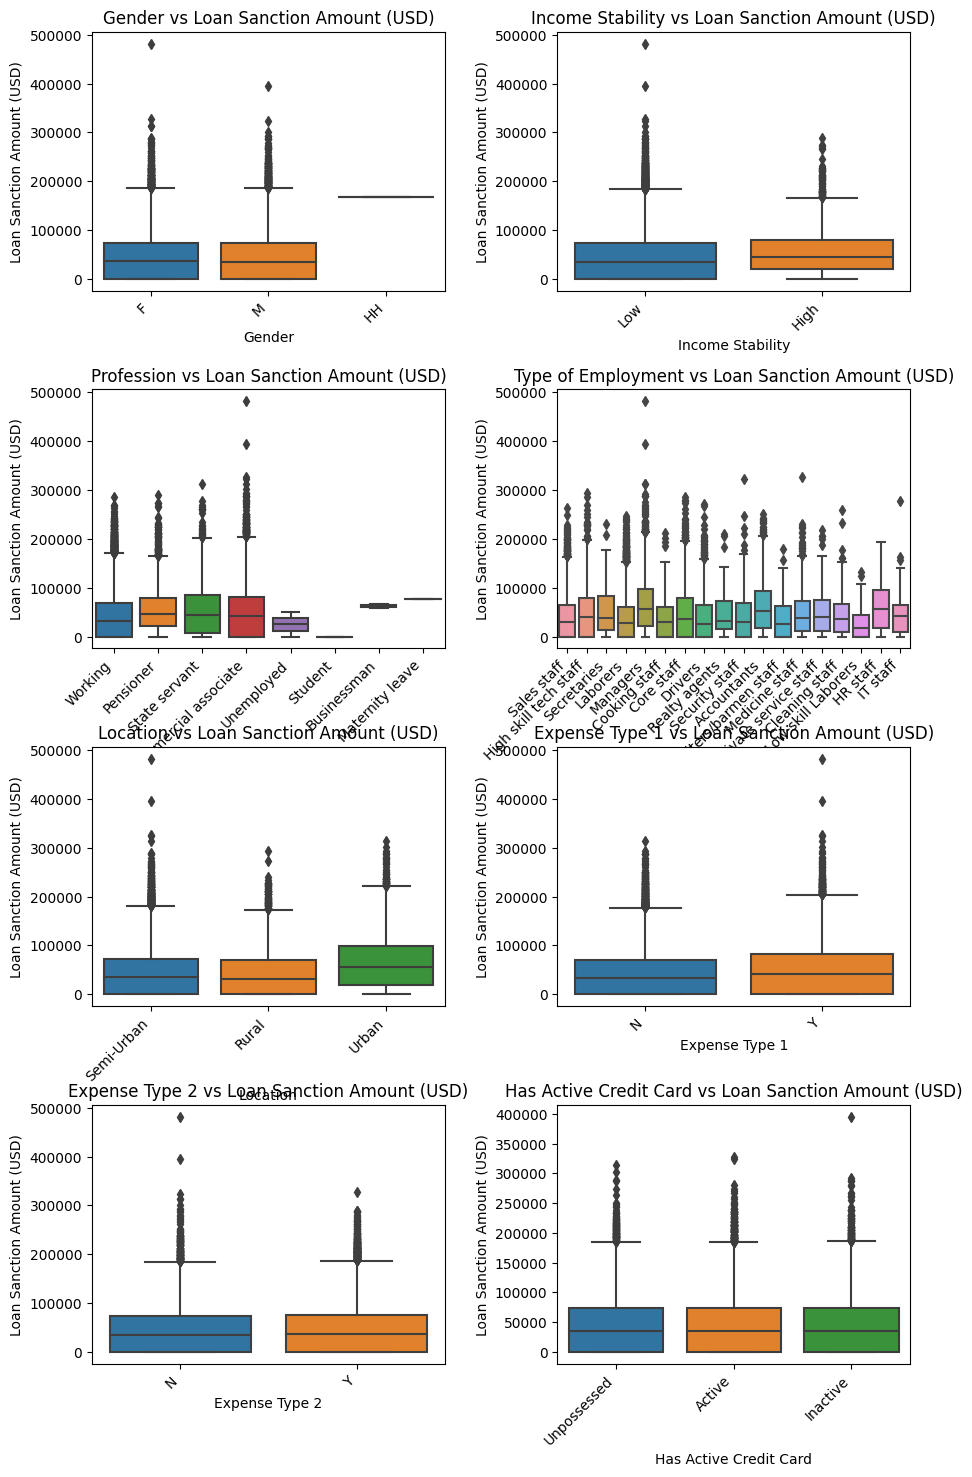

In [ ]:
fig, axes = plt.subplots(4,2,figsize=(10,15),dpi=100)
fig.tight_layout(pad=5.0)
cat_features = ['Gender','Income Stability','Profession','Type of Employment','Location','Expense Type 1','Expense Type 2','Has Active Credit Card','Property Location']
for cat_ft_count, ax in enumerate(axes):
    for row_count in range(4):
        for feat_count in range(2):
            sns.boxplot(ax=axes[row_count,feat_count],x=loan_data[cat_features[cat_ft_count]],y=loan_data['Loan Sanction Amount (USD)'])
            axes[row_count,feat_count].set_title(cat_features[cat_ft_count] + " vs Loan Sanction Amount (USD)")
            plt.sca(axes[row_count,feat_count])
            plt.xticks(rotation=45,ha='right')
            plt.ylabel('Loan Sanction Amount (USD)')
            cat_ft_count += 1
    break

Insights :


*   People with high income stability were given a high loan sanction amount
*   Managers, HR staff and accounts received a median loan sanction amount of $5000
*   People who live in urban area received the highest loan sanction amount



### **Missing** **Value** **Treatment**


In [ ]:
# For Feature "Property ID" and "Property Location"

In [ ]:
loan_data[loan_data['Property ID'] == 92][['Property ID', 'Property Location']].sample(5)

,Property ID,Property Location
24728,92,Rural
26818,92,Rural
170,92,Rural
11472,92,Rural
13620,92,Rural


In [ ]:
PPL_gb = loan_data.groupby(['Property ID', 'Property Location'])['Customer ID'].size().unstack().fillna(0)
PPL_gb

Property Location,Rural,Semi-Urban,Urban
Property ID,,,
1,0.0,0.0,32.0
2,0.0,0.0,21.0
3,0.0,0.0,25.0
4,0.0,29.0,0.0
5,0.0,28.0,0.0
...,...,...,...
995,0.0,28.0,0.0
996,0.0,0.0,27.0
997,0.0,28.0,0.0


We can see that for each Property ID the Property Location is always the same.

We will fill in missing values in Property Location using Property ID.

In [ ]:
pl_nulls = loan_data["Property Location"].isnull().sum()

null_index = loan_data[(loan_data['Property Location'].isnull()) & (loan_data['Property ID'].isin(PPL_gb.index))].index
loan_data.loc[null_index, "Property Location"] = loan_data.loc[null_index, 'Property ID'].apply(lambda x: PPL_gb.loc[x].idxmax())

print(f"Number of nulls in Property Location before {pl_nulls}")
print(f"Number of nulls in Property Location after {loan_data['Property Location'].isnull().sum()}")

Number of nulls in Property Location before 333
Number of nulls in Property Location after 0


In [ ]:
#For Feature "Profession" and "Income Stability"

Realation between Income Stability and Profession

<Axes: xlabel='Income Stability', ylabel='Profession'>

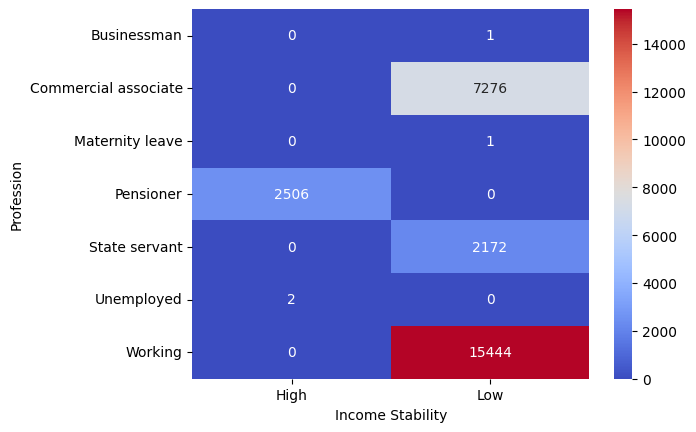

In [ ]:
PIS_gb = loan_data.groupby(['Profession', 'Income Stability']).size().unstack().fillna(0)
sns.heatmap(PIS_gb, fmt='g', annot=True, cmap='coolwarm')

Group of Profession and Income Stability


For every Profession Income Stability was same indicating that the data is consistent and clean

In [ ]:
is_nulls = loan_data["Income Stability"].isnull().sum()

null_index = loan_data[(loan_data['Income Stability'].isnull()) & (loan_data['Profession'].isin(PIS_gb.index))].index
loan_data.loc[null_index, 'Income Stability'] = loan_data.loc[null_index, 'Profession'].apply(lambda x: PIS_gb.loc[x].idxmax())

print(f"Number of nulls in Property Location before {is_nulls}")
print(f"Number of nulls in Property Location after {loan_data['Income Stability'].isnull().sum()}")

Number of nulls in Property Location before 1595
Number of nulls in Property Location after 1


In [ ]:
loan_data[loan_data['Income Stability'].isnull()][['Profession', 'Income Stability']]

,Profession,Income Stability
8078,Student,NaN


The Income Stability of a Student is probably low

In [ ]:
loan_data.loc[loan_data['Income Stability'].isnull(), "Income Stability"] = "Low"

In [ ]:
# For Feature "Type of Employment"

In [ ]:
#drop column
loan_data.drop('Type of Employment', axis=1, inplace=True)

In [ ]:
# For " Credit Score "

In [ ]:
# a function which will help us fill in nulls in train valid and test set while avoiding data leakage
def fill_column(loan_data, target, columns, grp_maps):
    target_series = loan_data[target].copy()
    for grp in grp_maps: # taking row in grp_rows
        temp = loan_data.copy()   # making a copy of df
        for index, col in enumerate(columns):
#             iterating though each column and filtering them with each  grp_rows index values(column name)
            temp = temp[temp[col] == grp[0][index]]
            index += 1
#        the filtered temp index which matches grp row index(colums)
        temp_nulls = temp[temp[target].isnull()].index
        if len(temp_nulls) == 0:
            continue
#       filling in nulls with grp row value
        target_series.loc[temp_nulls] = grp[1]

    return target_series

In [ ]:
loan_data.groupby(['Profession', 'Income Stability'])['Credit Score'].median()

Profession            Income Stability
Businessman           Low                 779.750
Commercial associate  Low                 741.890
Maternity leave       Low                 878.490
Pensioner             High                819.355
State servant         Low                 748.490
Student               Low                 637.140
Unemployed            High                685.295
Working               Low                 724.760
Name: Credit Score, dtype: float64

In [ ]:
cs_nulls = loan_data['Credit Score'].isnull().sum()

# getting gropy by median
PTE_gb =  loan_data.groupby(['Profession', 'Income Stability'])['Credit Score'].median()
# mapping group by values and their index as values in a tuple and storing them in a list to iterate over
PTE_maps = list(zip(PTE_gb.index, PTE_gb.values))

# using the fill_column function to fill in nulls
loan_data['Credit Score'] = fill_column(loan_data, 'Credit Score', ['Profession', 'Income Stability'], PTE_maps)


print(f"Number of nulls in Credit Score before {cs_nulls}")
print(f"Number of nulls in Credit Score after {loan_data['Credit Score'].isnull().sum()}")

Number of nulls in Credit Score before 1605
Number of nulls in Credit Score after 0


In [ ]:
#Income (USD) (Using 'Profession' and 'Location' to fill in nulls)

In [ ]:
loan_data.groupby(['Profession', 'Location'])['Income (USD)'].median().head(10)

Profession            Location  
Businessman           Semi-Urban     2551.670
                      Urban         10300.310
Commercial associate  Rural          2208.745
                      Semi-Urban     2442.080
                      Urban          3485.870
Maternity leave       Urban               NaN
Pensioner             Rural          1813.840
                      Semi-Urban     1856.985
                      Urban          2817.280
State servant         Rural          2154.105
Name: Income (USD), dtype: float64

In [ ]:
income_nulls = loan_data['Income (USD)'].isnull().sum()

PTEL_gb =  loan_data.groupby(['Profession', 'Location'])['Income (USD)'].median()
PTEL_maps = list(zip(PTEL_gb.index, PTEL_gb.values))

loan_data['Income (USD)'] = fill_column(loan_data, 'Income (USD)', ['Profession', 'Location'], PTEL_maps)


In [ ]:
# We will use median to fill in remaining nulls since we can not delete them as they belong to validation and test set
loan_data['Income (USD)'] = loan_data['Income (USD)'].fillna(loan_data['Income (USD)'].median())

In [ ]:
#For feature "Has Active Credit Card" and "Dependents"

In [ ]:
# filling in nulls in Has Active Credit Card with Unknown
loan_data['Has Active Credit Card'] = loan_data['Has Active Credit Card'].fillna("Unknown")

# filling in nulls in Dependents as 0
loan_data['Dependents'] = loan_data['Dependents'].fillna(0)

In [ ]:
loan_data['Current Loan Expenses (USD)'] = loan_data['Current Loan Expenses (USD)'].fillna(loan_data['Current Loan Expenses (USD)'].median())

In [ ]:
loan_data['Property Age'] = loan_data['Property Age'].fillna(loan_data['Property Age'].median())

In [ ]:
loan_data['Gender'] = loan_data['Gender'].fillna(loan_data['Gender'].mode()[0])

In [ ]:
no_of_rows = loan_data.shape[0]
missing_df = loan_data.isnull().sum().sort_values(ascending=False).to_frame(name='Missing_count')
missing_df['Missing_percentage'] = np.round((missing_df['Missing_count'] / no_of_rows)*100, 3)
missing_df

,Missing_count,Missing_percentage
Loan Sanction Amount (USD),323,1.114
Dependents,0,0.000
Property Price,0,0.000
Co-Applicant,0,0.000
Property Location,0,0.000
Property Type,0,0.000
Property Age,0,0.000
Property ID,0,0.000
Has Active Credit Card,0,0.000
No. of Defaults,0,0.000


In [ ]:
loan_data['Gender'] = loan_data['Gender'].replace({'HH': 'M'})

In [ ]:
feature_999=['Current Loan Expenses (USD)', 'Property Price']
for feature in feature_999:
  loan_data[feature].replace(-999.000,loan_data[feature].median(),inplace=True,regex=True)

In [ ]:
loan_data['Co-Applicant'].replace(-999.000,loan_data['Co-Applicant'].mode()[0],inplace=True,regex=True)

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28997 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  28997 non-null  object 
 1   Name                         28997 non-null  object 
 2   Gender                       28997 non-null  object 
 3   Age                          28997 non-null  int64  
 4   Income (USD)                 28997 non-null  float64
 5   Income Stability             28997 non-null  object 
 6   Profession                   28997 non-null  object 
 7   Location                     28997 non-null  object 
 8   Loan Amount Request (USD)    28997 non-null  float64
 9   Current Loan Expenses (USD)  28997 non-null  float64
 10  Expense Type 1               28997 non-null  object 
 11  Expense Type 2               28997 non-null  object 
 12  Dependents                   28997 non-null  float64
 13  Credit Score    

In [ ]:
loan_data = loan_data.dropna()

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28674 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  28674 non-null  object 
 1   Name                         28674 non-null  object 
 2   Gender                       28674 non-null  object 
 3   Age                          28674 non-null  int64  
 4   Income (USD)                 28674 non-null  float64
 5   Income Stability             28674 non-null  object 
 6   Profession                   28674 non-null  object 
 7   Location                     28674 non-null  object 
 8   Loan Amount Request (USD)    28674 non-null  float64
 9   Current Loan Expenses (USD)  28674 non-null  float64
 10  Expense Type 1               28674 non-null  object 
 11  Expense Type 2               28674 non-null  object 
 12  Dependents                   28674 non-null  float64
 13  Credit Score    

In [ ]:
loan = loan_data.copy()

In [ ]:
from google.colab import files
loan.to_csv('loan.csv')
files.download('loan.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

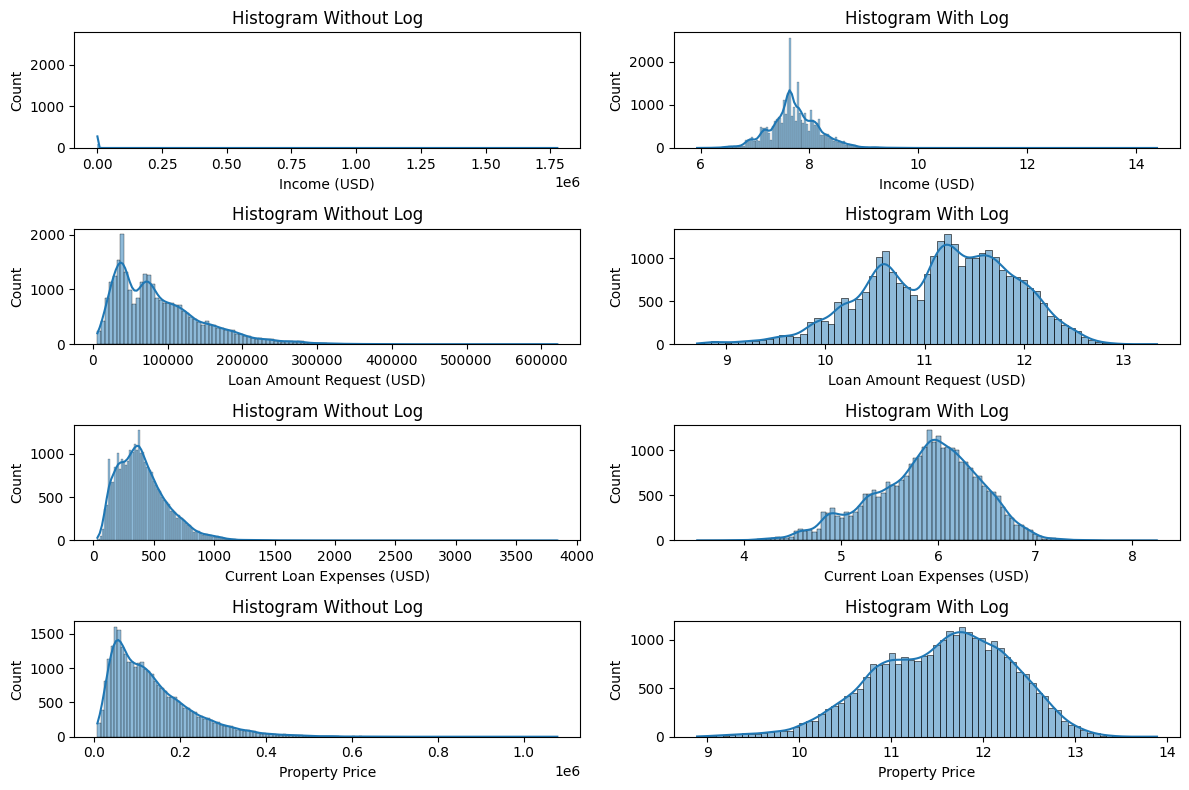

In [ ]:
col_to_log = ['Income (USD)', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)', 'Property Price']
plt.figure(figsize=(12, 8))

for index, col in enumerate(col_to_log):
  plt.subplot(4, 2, 2*index+1)
  sns.histplot(x=loan[col], kde=True)
  plt.title(f'Histogram Without Log')

  plt.subplot(4, 2, 2*index+2)
  sns.histplot(x=np.log(loan[col]), kde=True)
  plt.title(f'Histogram With Log')

plt.tight_layout()

In [ ]:
for col in col_to_log:
    loan[col] = np.log(loan[col])

In [ ]:
loan = loan.drop('Customer ID', axis = 1)

In [ ]:
loan = loan.drop('Name', axis = 1)

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28674 entries, 0 to 29999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       28674 non-null  object 
 1   Age                          28674 non-null  int64  
 2   Income (USD)                 28674 non-null  float64
 3   Income Stability             28674 non-null  object 
 4   Profession                   28674 non-null  object 
 5   Location                     28674 non-null  object 
 6   Loan Amount Request (USD)    28674 non-null  float64
 7   Current Loan Expenses (USD)  28674 non-null  float64
 8   Expense Type 1               28674 non-null  object 
 9   Expense Type 2               28674 non-null  object 
 10  Dependents                   28674 non-null  float64
 11  Credit Score                 28674 non-null  float64
 12  No. of Defaults              28674 non-null  int64  
 13  Has Active Credi

In [ ]:
Categorical

['Customer ID',
 'Name',
 'Gender',
 'Income Stability',
 'Profession',
 'Type of Employment',
 'Location',
 'Expense Type 1',
 'Expense Type 2',
 'Has Active Credit Card',
 'Property Location']

In [ ]:
Categorical_Cols = ['Gender', 'Income Stability', 'Profession', 'Location', 'Expense Type 1', 'Expense Type 2', 'Has Active Credit Card', 'Property Location']

In [ ]:
cat_columns = ['Gender', 'Income Stability', 'Profession', 'Location', 'Expense Type 1', 'Expense Type 2', 'Has Active Credit Card', 'Property Location']